# Flattening mathematical functions 

Mathematical functions come in all shapes and sizes and - moreover - we can often express indnividual equations in a variety of different ways.  This short section discusses a standardization technique called *function flattening*, which allows us to express any mathematical function  in the generic form $g\left(\mathbf{w}\right)$ we have been using thus far.  Flattening is a particularly useful *pre-processing* step as it allows us to more broadly understand the fundamental optimization precepts we have / will see as well as more easily *implement* (in code) local optimization steps of the generic form

\begin{equation}
\mathbf{w}^{k} = \mathbf{w}^{k-1} + \alpha \, \mathbf{d}^{k}.
\end{equation}

Take the following quadratic function $f$ of two $N\times 1$ variables $\mathbf{a}$ and $\mathbf{b}$

\begin{equation}
f\left(\mathbf{a},\mathbf{b} \right) = \left(\sum_{n=1}^{N} a_nb_n\right)^2.
\end{equation}

This function is not written in the generic form $g\left(\mathbf{w}\right)$ we have used throughout this Chapter (and which we will use throughout future Chapters as well), but of course all of the principles and algorithms we have seen / will see still apply to it.  So we can e.g., apply gradient descent to minimize the function.  To do this however we need to compute the gradient of $h$ with respect to  each input variable $\mathbf{a}$ and $\mathbf{b}$, and descend in each input variable as

\begin{equation}
\begin{array}
\
\mathbf{a}^k = \mathbf{a}^{k-1} - \alpha \, \nabla_{\mathbf{a}}\,f\left(\mathbf{a}^{k-1},\mathbf{b}^{k-1}\right) \\
\mathbf{b}^k = \mathbf{b}^{k-1} - \alpha \, \nabla_{\mathbf{b}}\,f\left(\mathbf{a}^{k-1},\mathbf{b}^{k-1}\right) \\
\end{array}
\end{equation}

in order to complete the $k^{th}$ step. 

There is a absolutely nothing wrong with this - it is a valid gradient descent step for the function given above.  It is however slightly more cumbersome to write - and implement - than a function of a single set of inputs like our standard $g\left(\mathbf{w}\right)$ whose descent step can be written and implemented in a single line (one taken in $\mathbf{w}$).  This annoyance is greatly amplified when dealing with functions of many inputs variables - which can be scalars, vectors, or even matrices - which we will regularly encounter during our machine learning voyage.  For such functions, in order to take a single gradient descent step we must *loop* over their many different input variables.

Thankfully every mathematical function can be re-expressed so that *all* of its input variables are represented as a single contiguous array $\mathbf{w}$, which alleivates this irritation.  For example in the example above we can easily see that by *re-indexing* entries of $\mathbf{a}$ and $\mathbf{b}$ using a single array as

\begin{equation}
\mathbf{w} = 
\begin{bmatrix}
a_1 \\
\vdots \\
a_N \\
b_1 \\
\vdots \\
b_N \\
\end{bmatrix} = 
\begin{bmatrix}
w_1 \\
\vdots \\
w_N \\
w_{N+1} \\
\vdots \\
w_{2N} \\
\end{bmatrix}
\end{equation}

the function in equation (1) above can then be equivalently written as

\begin{equation}
g\left(\mathbf{w}\right) = \sum_{n=1}^N\left(w_nw_{n+N}\right)^2.
\end{equation}

Again note that all we have really done here is *re-indexed* the entries of both input vectors in a contiguous manner.  When expressed in this standardized manner we can both more easily reference optimization principles (which were scribed in Sections for functions in this standard form) and implement local optimization schemes like gradient descent in a less cumbersome way in a single line of algebra or `autograd` `Python` code, instead of requiring a loop over each input variable.  This variable re-indexing scheme is called *function flattening*, and can be applied to any mathematical function in principle. 

While performing the re-indexing required to flatten a function properly by hand for each and every function we come across is important, it (like derivative computation itself) is a repetitive and time consuming operations for human to perform themselves.  Therefore *in practice* we will automate this task, employing a flattening module from the `Python` `autograd` library.  This module can be imported from the `autograd` library (introduced in the previous Section) via the line below.

In [1]:
# import function flattening module from autograd
from autograd.misc.flatten import flatten_func

To flatten a mathematical function scribed in `numpy` and `Python` called `f` - written in such a way that it takes in a single list containing all of its input variables - we then simply call the line below.  Here on the right hand side `weights` is a list of initializations for input variables to the function `f`.  The outputs `g`, `unflatten_func`, and `w` are the flattened version of `f`, a module to unflatten the input weights, and a flattened version of the intitial weights respectively.

In [ ]:
# flatten an input function g
g, unflatten_func, w = flatten_func(f, input_weights)

This flattened function and initialization can then be directly used with the gradient descent implementation given above.

#### <span style="color:#a50e3e;">Example 5. </span>  Gradient descent on a flattened function

In this example we take the following function of several variables - a scalar, vector, and matrix

\begin{equation}
f\left(a,\mathbf{b},\mathbf{C}\right) = 
\left(a + \mathbf{z}^T\mathbf{b} + 
\mathbf{z}^T\mathbf{C}\mathbf{z} 
\right)^2
\end{equation}

and flatten it using the `autograd` module `flatten_func` in order to then minimize it using the gradient descent implementation given above.  Here the input variable $a$ is a scalar, $\mathbf{b}$ is a $2 \times 1$ vector, $\mathbf{C}$ is a $2\times 2$ matrix, and the non-variable vector $\mathbf{z}$ is fixed at $\mathbf{z} = \begin{bmatrix} 1 \\ 1 \end{bmatrix}$.

<figure>
<img src="flattening.png" width=700 height=250/>
  <figcaption>   
<strong>Figure 1:</strong> <em> A figurative illustration of function flattening using the current example.
</em>  </figcaption> 
</figure>

Below we define a `Python` version of the function defined above.  Note here that the input to this implementation is a list of the functions input variables (or weights).

In [75]:
from autograd import numpy as np
# Python implementation of the function above using autograd
N = 2
z = np.ones((N,1))
def f(input_weights):
    a = input_weights[0]
    b = input_weights[1]
    C = input_weights[2]
    return (((a + np.dot(z.T,b) + np.dot(np.dot(z.T,C),z)))**2)[0][0]

By using the `flatten_func` module as shown above we can then minimize the flattened version of this function properly.  In particular 

In [76]:
# create random initialization of each weight component
a = np.random.randn(1,1); b = np.random.randn(N,1); C = np.random.randn(N,N)

# store all weight components in single list
w0 = [a,b,C]

# flatten the input function f, and input initialization w0
f_flat, unflatten_func, w0_flat = flatten_func(f, w0)

we get the flattened version of the function `f_flat` and flattened initialization `w0_flat`.

We can then compare the initial list of weights

In [77]:
print(w0)

[array([[0.84687374]]), array([[-0.36986878],
       [ 1.39818905]]), array([[ 2.76723201, -0.53744202],
       [ 0.51319059, -0.87498202]])]


to our flattened version, which is now one contiguous list

In [78]:
print (w0_flat)
print (w0_flat.shape)

[ 0.84687374 -0.36986878  1.39818905  2.76723201 -0.53744202  0.51319059
 -0.87498202]
(7,)


We can now more easily minimize this function by using its flattened version, avoiding the necessity to explicitly loop over each of its original weight components.  We can do this by using gradient descent, leveraging  `autograd` to automatically compute the gradient of our (flattened) function as shown below (to learn more about gradient descent see Chapter 3 of [this repo](https://github.com/jermwatt/mlrefined)).  

In [79]:
from autograd import grad

'''
a simple gradient descent implementation to minimize our flattened function, here
- f: our input (flattened) function
- w: initial weight values of (flattened) function
- alpha: steplength
- max_its: maximum iterations / stopping condition
'''
def gradient_descent(f,w,alpha,max_its):
    # compute gradient function of input (flattened) function f
    nabla_f = grad(f)
    
    # make containers for weights / cost function histories
    w_hist = [w]
    f_hist = [f(w)]
    
    # main gradient descent loop
    for k in range(max_its):
        # take step
        w = w - alpha*nabla_f(w)
        
        # record update
        w_hist.append(w)
        f_hist.append(f(w))
    return w_hist,f_hist

With our simple gradient descent function defined we can run it (with simple choices of parameters) to minimize our flattened function, plotting a cost function history from the run to verify that we have minimized properly.  

In [ ]:
# minimize flattened functino via gradient descent
w_hist,f_hist = gradient_descent(f_flat,w0_flat,alpha=0.1,max_its=10)

Viewing the cost function history plot we can see that we indeed minimized it quite well.

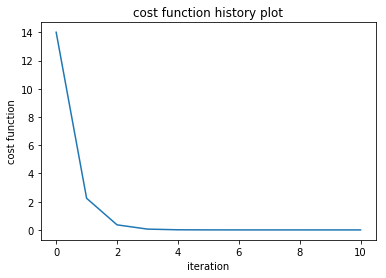

In [82]:
# plot cost function history -f_hist
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(f_hist)
plt.xlabel('iteration')
plt.ylabel('cost function')
plt.title('cost function history plot')
plt.show()